Оценка коэффициентов:
  a = 0.065682
  b = 0.00004851
  c = 0.411907
  d = 0.00005023


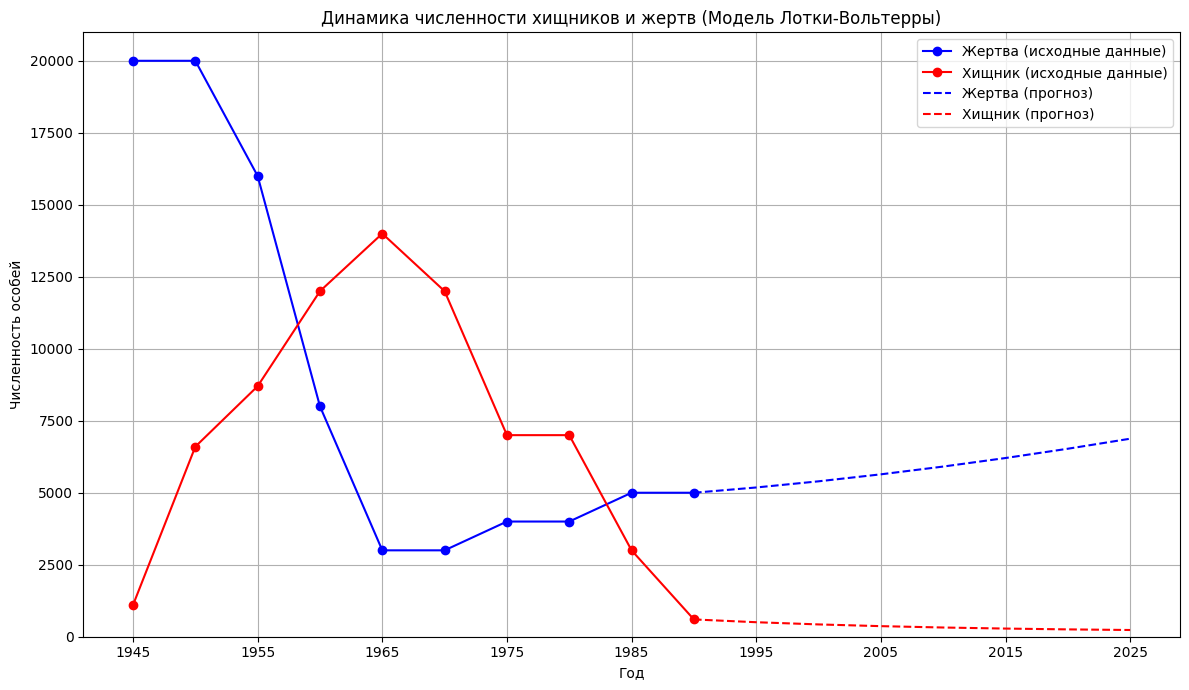


Прогноз численности:
Год	Жертва (прогноз)	Хищник (прогноз)
1995	5183			504
2000	5397			427
2005	5639			367
2010	5909			320
2015	6206			283
2020	6528			255
2025	6876			233


In [57]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

years = np.array([1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990])
x_data = np.array([20000, 20000, 16000, 8000, 3000, 3000, 4000, 4000, 5000, 5000])
y_data = np.array([1100, 6600, 8700, 12000, 14000, 12000, 7000, 7000, 3000, 600])

assert len(years) == len(x_data) == len(y_data), "Длины массивов данных должны совпадать!"

def objective_function(params, x_data, y_data):
    a, b, c, d = params
    error_sum = 0.0

    for i in range(len(x_data) - 1):
        x_i = x_data[i]
        y_i = y_data[i]

        x_next_pred = x_i + a * x_i - b * x_i * y_i
        y_next_pred = y_i - c * y_i + d * x_i * y_i

        x_next_actual = x_data[i+1]
        y_next_actual = y_data[i+1]

        error = (x_next_pred - x_next_actual)**2 + (y_next_pred - y_next_actual)**2

        error_sum += error

    return error_sum

initial_guess = [0.5, 1e-5, 0.5, 1e-5]

bounds = [(0, None), (0, None), (0, None), (0, None)]

result = minimize(objective_function, initial_guess, args=(x_data, y_data),
                  method='L-BFGS-B', bounds=bounds)

if result.success:
    estimated_params = result.x
    a_est, b_est, c_est, d_est = estimated_params
    print("Оценка коэффициентов:")
    print(f"  a = {a_est:.6f}")
    print(f"  b = {b_est:.8f}")
    print(f"  c = {c_est:.6f}")
    print(f"  d = {d_est:.8f}")
else:
    print("Оптимизация не удалась:", result.message)
    a_est, b_est, c_est, d_est = initial_guess

years_predict_start = 1995
years_predict_end = 2025
prediction_years = np.arange(years_predict_start, years_predict_end + 1, 5)

x_current = x_data[-1]
y_current = y_data[-1]

x_predicted = []
y_predicted = []

for year in prediction_years:
    x_next = x_current + a_est * x_current - b_est * x_current * y_current
    y_next = y_current - c_est * y_current + d_est * x_current * y_current

    x_next = max(0, x_next)
    y_next = max(0, y_next)

    x_predicted.append(x_next)
    y_predicted.append(y_next)

    x_current = x_next
    y_current = y_next

x_predicted = np.array(x_predicted)
y_predicted = np.array(y_predicted)

x_model_fit = [x_data[0]]
y_model_fit = [y_data[0]]
x_curr_fit = x_data[0]
y_curr_fit = y_data[0]
for i in range(len(years) - 1):
     x_next_fit = x_curr_fit + a_est * x_curr_fit - b_est * x_curr_fit * y_curr_fit
     y_next_fit = y_curr_fit - c_est * y_curr_fit + d_est * x_curr_fit * y_curr_fit
     x_next_fit = max(0, x_next_fit)
     y_next_fit = max(0, y_next_fit)
     x_model_fit.append(x_next_fit)
     y_model_fit.append(y_next_fit)
     x_curr_fit = x_next_fit
     y_curr_fit = y_next_fit

plt.figure(figsize=(12, 7))

plt.plot(years, x_data, 'bo-', label='Жертва (исходные данные)')
plt.plot(years, y_data, 'ro-', label='Хищник (исходные данные)')

plot_years_pred = np.concatenate(([years[-1]], prediction_years))
plot_x_pred = np.concatenate(([x_data[-1]], x_predicted))
plot_y_pred = np.concatenate(([y_data[-1]], y_predicted))

plt.plot(plot_years_pred, plot_x_pred, 'b--', label='Жертва (прогноз)')
plt.plot(plot_years_pred, plot_y_pred, 'r--', label='Хищник (прогноз)')

plt.xlabel("Год")
plt.ylabel("Численность особей")
plt.title("Динамика численности хищников и жертв (Модель Лотки-Вольтерры)")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(min(years), max(prediction_years)+1, 10))
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

print("\nПрогноз численности:")
print("Год\tЖертва (прогноз)\tХищник (прогноз)")
for i, year in enumerate(prediction_years):
    print(f"{year}\t{x_predicted[i]:.0f}\t\t\t{y_predicted[i]:.0f}")

# plt.figure(figsize=(12, 7))
# plt.plot(years, x_data, 'bo-', label='Жертва (исходные данные)')
# plt.plot(years, y_data, 'ro-', label='Хищник (исходные данные)')
# plt.plot(years, x_model_fit, 'g^--', label='Жертва (симуляция модели)')
# plt.plot(years, y_model_fit, 'm^--', label='Хищник (симуляция модели)')
# plt.xlabel("Год")
# plt.ylabel("Численность особей")
# plt.title("Сравнение симуляции модели с исходными данными")
# plt.legend()
# plt.grid(True)
# plt.xticks(years, rotation=45)
# plt.ylim(bottom=0)
# plt.tight_layout()
# plt.show()